# Project Name : Pizza Price Prediction

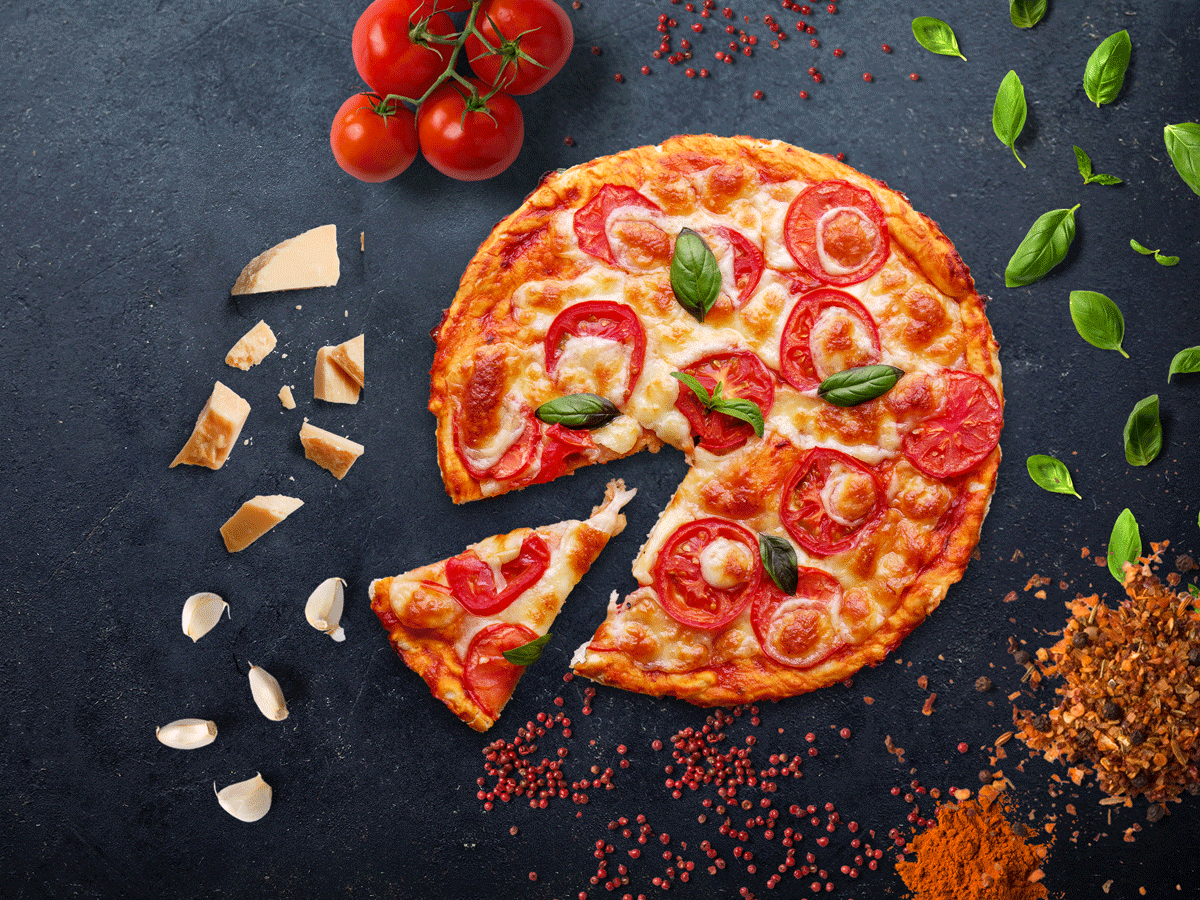

## Context
### The dataset given is for predicting the prices of pizza, the dataset is not complete at all, but you can use this dataset for learning or study or maybe you want to upgrade the data by yourself, is okay for me, hopefully, this dataset is useful for you guys, and use this dataset wisely.

### In this project we will be building a model which will predict the prices of data based on different parameters such as number of toppings, diameter, etc.

#### We will use different Machine Learning Models and then we will see how we can do all of this with the help of Auto Machine Learning. We will be using Eval ML Library for this project

### Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis
- Feature Engineering
- Model building using ML models
- Model building and prediction using Auto ML

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading the DataSet

In [2]:
df= pd.read_csv("pizza_v2.csv")

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [7]:
# Renaming the price column
df.rename({'price_rupiah':'price'}, axis=1, inplace=True)

# Extracting digits in price column and converting to integer
df.price = df.price.str.replace('Rp','').str.replace(',','').astype(int)

# Extracting digits in diameter and converting to integer
df['diameter'] = df['diameter'].str.extract('(\d+\.?\d*)').astype(float) 

In [8]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


### Data Analysis

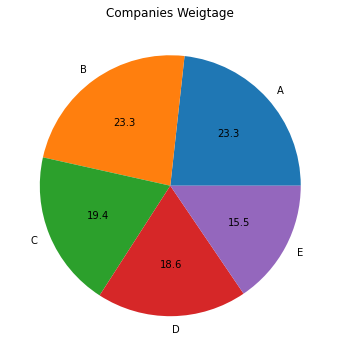

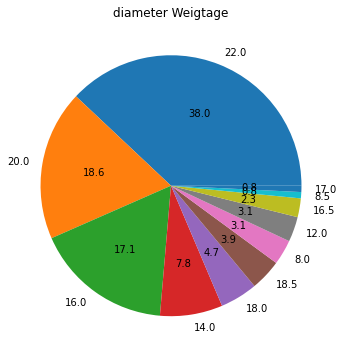

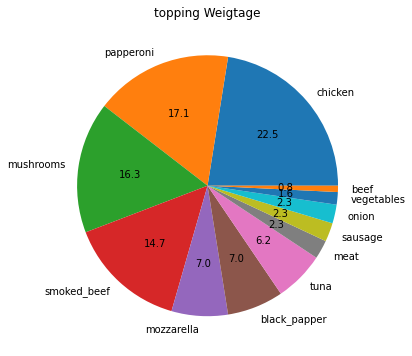

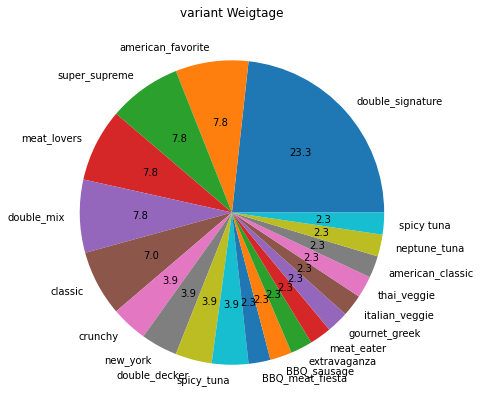

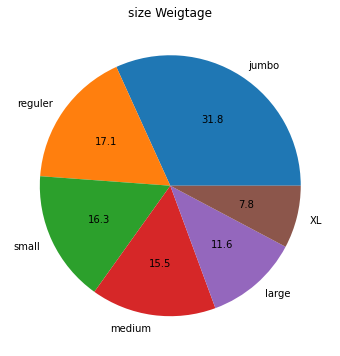

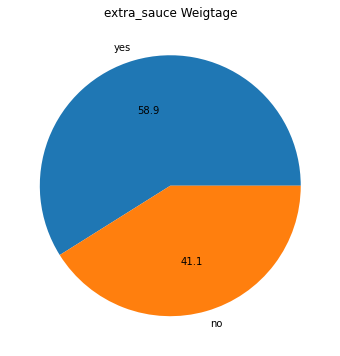

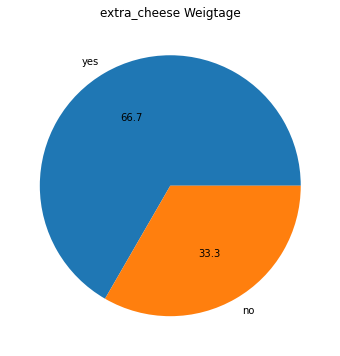

In [9]:
import plotly.express as px
plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),autopct='%.1f', labels= df['company'].unique())
plt.title('Companies Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['diameter'].value_counts(),autopct='%.1f', labels= df['diameter'].unique())
plt.title('diameter Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['topping'].value_counts(),autopct='%.1f', labels= df['topping'].unique())
plt.title('topping Weigtage')
plt.show()

plt.figure(figsize=(7,7))
plt.pie(df['variant'].value_counts(),autopct='%.1f', labels= df['variant'].unique())
plt.title('variant Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['size'].value_counts(),autopct='%.1f', labels= df['size'].unique())
plt.title('size Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_sauce'].value_counts(),autopct='%.1f', labels= df['extra_sauce'].unique())
plt.title('extra_sauce Weigtage')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_cheese'].value_counts(),autopct='%.1f', labels= df['extra_cheese'].unique())
plt.title('extra_cheese Weigtage')
plt.show()

<AxesSubplot:xlabel='company', ylabel='Count'>

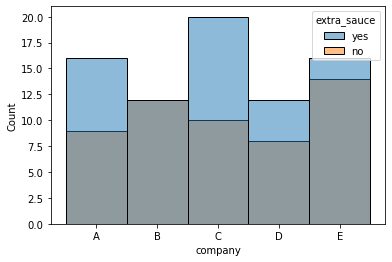

In [10]:
sns.histplot(data=df, x="company",hue='extra_sauce')

<AxesSubplot:xlabel='company', ylabel='Density'>

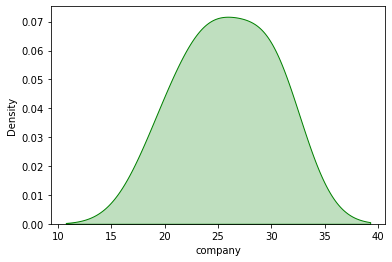

In [11]:
df_company=df.groupby('company').agg({'company':['count']})
sns.kdeplot(df['company'].value_counts(), color='g', shade=True)

<AxesSubplot:xlabel='topping', ylabel='Density'>

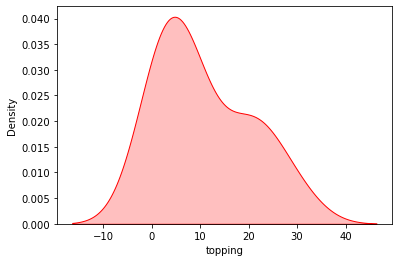

In [12]:
df_company=df.groupby('topping').agg({'topping':['count']})
sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)

<AxesSubplot:xlabel='company', ylabel='Count'>

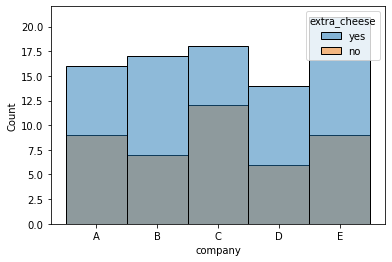

In [13]:
sns.histplot(data=df, x="company",hue='extra_cheese')

<AxesSubplot:xlabel='company', ylabel='Count'>

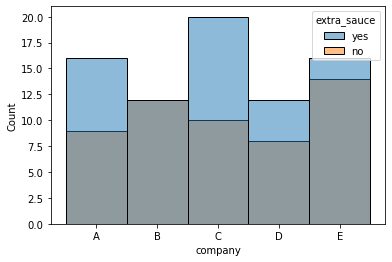

In [14]:
sns.histplot(data=df, x="company",hue='extra_sauce')

<AxesSubplot:xlabel='price', ylabel='Count'>

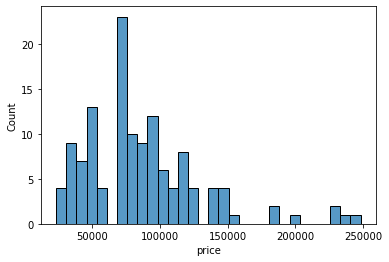

In [15]:
sns.histplot(data=df, x='price',bins=30)

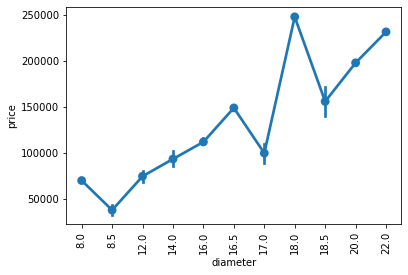

In [16]:
# Pizza Diameter vs mean Price
sns.pointplot(data=df.sort_values(by='diameter'),
              x='diameter', y='price')
plt.xticks(rotation=90);

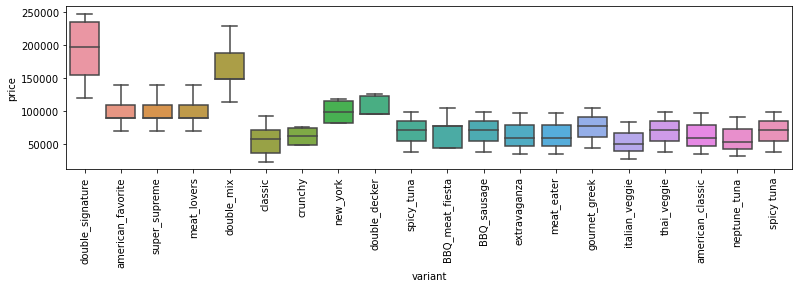

In [17]:
plt.figure(figsize=(13,3))
sns.boxplot(data=df, x='variant', y='price')
plt.xticks(rotation=90)
plt.show()

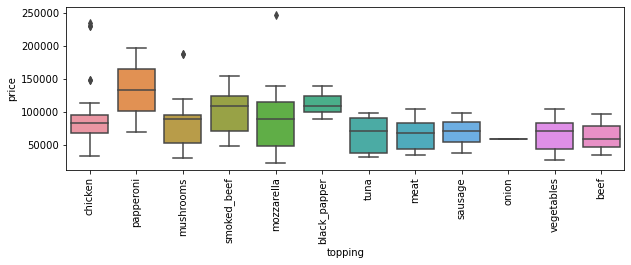

In [18]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='topping', y='price')
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

#### One Hot Encoding

In [19]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#import category_encoders as ce

# def one_hot_encoding(df,col):
#     one_hot_encoder = OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
#     df_final = one_hot_encoder.fit_transform(df)
#     return df_final

# def one_hot(df, column):
#     df = one_hot_encoding(df,column)
#     return df

In [20]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [21]:
df1 = pd.get_dummies(df)

In [22]:
# df = one_hot(df, 'company')
# df = one_hot(df, 'topping')
# df = one_hot(df, 'variant')
# df = one_hot(df, 'size')
# df = one_hot(df, 'extra_sauce')
# df = one_hot(df, 'extra_cheese')

df1.head()

,price,diameter,company_A,company_B,company_C,company_D,company_E,topping_beef,topping_black_papper,topping_chicken,...,size_large,size_medium,size_reguler,size_small,extra_sauce_no,extra_sauce_yes,extra_cheese_no,extra_cheese_yes,extra_mushrooms_no,extra_mushrooms_yes
0,235000,22.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
1,198000,20.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,120000,16.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3,155000,14.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,248000,18.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      129 non-null    int32  
 1   diameter                   129 non-null    float64
 2   company_A                  129 non-null    uint8  
 3   company_B                  129 non-null    uint8  
 4   company_C                  129 non-null    uint8  
 5   company_D                  129 non-null    uint8  
 6   company_E                  129 non-null    uint8  
 7   topping_beef               129 non-null    uint8  
 8   topping_black_papper       129 non-null    uint8  
 9   topping_chicken            129 non-null    uint8  
 10  topping_meat               129 non-null    uint8  
 11  topping_mozzarella         129 non-null    uint8  
 12  topping_mushrooms          129 non-null    uint8  
 13  topping_onion              129 non-null    uint8  

In [24]:
# df = one_hot(df, 'extra_mushrooms')

In [25]:
# df.head()

In [26]:
# df.dtypes

In [27]:
x = df1.drop("price",axis = 1)
y = df1["price"]

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

## Model Building using ML Algorithms


### We will be using the following models:
- XGB Regressor
- Support Vector Regressor

## XGB Regressor

### We will use Grid Search CV for finding the best parameters

In [29]:
from xgboost import XGBRegressor

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid= {'n_estimators':[2000,4000,6000],
             'max_depth':[3,4,5,6],
             'learning_rate':[0.01,0.1,0.2,0.3,0.5]
}

In [32]:
final = GridSearchCV(XGBRegressor(random_state=42),
                                    param_grid=param_grid,
                                    scoring='r2')

In [33]:
X_train.head()

,diameter,company_A,company_B,company_C,company_D,company_E,topping_beef,topping_black_papper,topping_chicken,topping_meat,...,size_large,size_medium,size_reguler,size_small,extra_sauce_no,extra_sauce_yes,extra_cheese_no,extra_cheese_yes,extra_mushrooms_no,extra_mushrooms_yes
74,12.0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
109,12.0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
40,12.0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
8,12.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
43,8.5,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0


In [34]:
final.fit(X_train,Y_train)

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\sadpa\anaconda3\envs\pyspark\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is de

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                            

In [35]:
final.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 2000}

In [36]:
Best_param= {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 2000}

In [37]:
xgb= XGBRegressor(learning_rate= 0.2,
                  max_depth= 6, 
                  n_estimators= 2000,
                  n_jobs = -1 #Use all cores
                 )

In [38]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [39]:
pred= xgb.predict(X_test)

In [40]:
from sklearn import metrics

In [41]:
mae = metrics.mean_absolute_error(pred, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 5580.29612
RMSE: 11468.62218
r2 score: 0.79797


## SVR

In [42]:
from sklearn.svm import SVR

In [43]:
svr= SVR()

In [44]:
svr.fit(X_train,Y_train)

SVR()

In [45]:
pred1= svr.predict(X_test)

In [46]:
mae = metrics.mean_absolute_error(pred1, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred1, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred1, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 26207.06737
RMSE: 31453.99261
r2 score: -42913682.61978


## Auto ML

# EVAL ML : 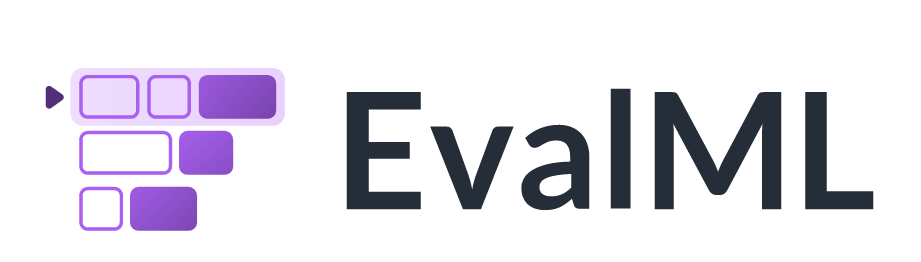

### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.

### Installing Eval ML

### We will use the same train and test dataset for this

In [47]:
#!pip install evalml

In [48]:
import evalml

In [49]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [50]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='regression')

**Running the Auto ML to select best Algorithm**

In [51]:
X_train.shape

(103, 50)

In [52]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, 
                      y_train=y_train, 
                      problem_type='regression', 
                      max_iterations=100, 
                      n_jobs=-1, 
                      patience=5,
                      tolerance=0.10, 
                 )
automl.search()

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.120e+09, tolerance: 1.422e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+09, tolerance: 1.508e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.658e+09, tolerance: 1.704e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.302e+09, tolerance: 1.422e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e+09, tolerance: 1.508e+07
Objective did n

In [53]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,XGBoost Regressor w/ Imputer + Select Columns ...,7,0.903592,0.071110,0.903592,24682.059983,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,10,Stacked Ensemble Regression Pipeline,10,0.897771,0.073510,0.897771,24523.698040,False,{'Linear Pipeline - Imputer': {'categorical_im...
2,5,Decision Tree Regressor w/ Imputer + Select Co...,5,0.861280,0.113869,0.861280,23530.959193,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,Random Forest Regressor w/ Imputer,2,0.852980,0.090333,0.852980,23305.168414,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,4,Random Forest Regressor w/ Imputer + RF Regres...,4,0.850043,0.089019,0.850043,23225.249041,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,3,Elastic Net Regressor w/ Imputer + Standard Sc...,3,0.838305,0.060231,0.838305,22905.936808,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,6,Extra Trees Regressor w/ Imputer + Select Colu...,6,0.823130,0.057658,0.823130,22493.100997,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Elastic Net Regressor w/ Imputer + Standard Sc...,1,0.779511,0.067756,0.779511,21306.441075,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,9,LightGBM Regressor w/ Imputer + Select Columns...,9,0.359802,0.021041,0.359802,9888.343887,False,{'Imputer': {'categorical_impute_strategy': 'm...
9,8,CatBoost Regressor w/ Imputer + Select Columns...,8,0.157341,0.032128,0.157341,4380.436136,False,{'Imputer': {'categorical_impute_strategy': 'm...


In [54]:
automl.best_pipeline

pipeline = RegressionPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Select Columns Transformer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Select Columns Transformer':{'columns': ['diameter', 'company_A', 'company_B', 'company_C', 'company_D', 'topping_black_papper', 'topping_chicken', 'topping_meat', 'topping_mozzarella', 'topping_mushrooms', 'topping_papperoni', 'topping_smoked_beef', 'variant_classic', 'variant_double_decker', 'variant_double_mix', 'variant_double_signature', 'size_jumbo', 'size_large', 'size_medium', 'size_reguler', 'size_small', 'extra_sauce_no', 'extra_sauce_yes', 'extra_cheese_no', 'extra_cheese_yes']}, 'XGBoost Regressor':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 

In [55]:
best_pipeline=automl.best_pipeline

In [56]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])



*************************************************************
* XGBoost Regressor w/ Imputer + Select Columns Transformer *
*************************************************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Select Columns Transformer
	 * columns : ['diameter', 'company_A', 'company_B', 'company_C', 'company_D', 'topping_black_papper', 'topping_chicken', 'topping_meat', 'topping_mozzarella', 'topping_mushrooms', 'topping_papperoni', 'topping_smoked_beef', 'variant_classic', 'variant_double_decker', 'variant_double_mix', 'variant_double_signature', 'size_jumbo', 'size_large', 'size_medium', 'size_reguler', 'size_small', 'extra_sauce_no', 'extra_sauce_yes', 'extra_cheese_no', 'extra_cheese_yes']
3. XGBoost Regressor
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimator

In [57]:
best_pipeline.score(X_test, y_test, objectives=["R2"])

OrderedDict([('R2', 0.9211737023058698)])

### Making a model based on R2 objective

In [58]:
automl_r2 = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='regression',
                          objective='R2',
                          
                          max_batches=1,
                          optimize_thresholds=True)

automl_r2.search()

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.120e+09, tolerance: 1.422e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+09, tolerance: 1.508e+07
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.658e+09, tolerance: 1.704e+07


In [59]:
automl_r2.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,Random Forest Regressor w/ Imputer,2,0.852980,0.090333,0.852980,23305.168414,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,1,Elastic Net Regressor w/ Imputer + Standard Sc...,1,0.779511,0.067756,0.779511,21306.441075,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,0,Mean Baseline Regression Pipeline,0,-0.003676,0.002663,-0.003676,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [61]:
automl_r2.describe_pipeline(automl_r2.rankings.iloc[0]["id"])


**************************************
* Random Forest Regressor w/ Imputer *
**************************************

Problem Type: regression
Model Family: Random Forest

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Random Forest Regressor
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 1.1 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE           MSE       MAE  Root Mean Squared Error # Training # Validation
0           0.936        0.936 36044.286  7304.679 163761782.145  9871.772                12796.944         68           35
1           0.757        0.757 96455.000  8888.122 579303294.061 14906.460                24068.720         69           34
2           0.867        0.881 58722.135  7095.326 240610127.591 10468.

In [62]:
best_pipeline_r2 = automl_r2.best_pipeline


In [63]:
best_pipeline_r2.score(X_test, Y_test,  objectives=["R2"])

OrderedDict([('R2', -1.024126726885771)])

#### Save the model

In [64]:
best_pipeline.save("model.pkl")

#### Load our model

In [65]:

final_model=automl.load('model.pkl')

#### Final Predictions

In [66]:
final_model.predict(X_test)

40      73418.710938
24     148408.671875
107     68545.976562
51      89854.867188
8       91776.921875
122     84383.117188
44      47739.828125
104     84383.117188
73      35127.324219
7       80144.921875
60      85916.859375
10     140242.796875
90      48374.464844
97      90776.945312
30      96223.375000
33      90628.421875
2      148701.187500
59      63103.957031
50      63103.957031
26      48374.464844
22     113888.250000
109     74704.218750
48      96417.304688
68      73031.906250
92      50107.667969
124     39013.960938
Name: price, dtype: float64